This Notebook implements a basic SoftMax Logistic Regression on the MNIST dataset using Numpy.

In [1]:
import numpy as np
import time
import os
import struct
import matplotlib.pyplot as plt
%matplotlib inline

Compute Y = X * W + b with C classes, n inputs and m samples.
X will have dimensions of (m,n), W of (n,C) and b of (1,C)
X * W will gives us a matrix of size m * C which is what we would expect and Y will be size m * C with one hot encoding.

Lets run softmax over a simple example with m=4 samples, C=3 classes and n=3 inputs.

The m samples will have inputs [0.6,0.3,0.1], [0.3,0.5,0.2], [0.0,0.1,0.9] and [0.1,0.6,0.4] with output classes of 0,1,2,1 respectively. The output class reflects the highest valued input index.


In [2]:
def InitExample():
    X=np.array([[0.6,0.3,0.1],[0.3,0.5,0.2],[0.0,0.1,0.9],[0.1,0.6,0.4]])
    labels=np.array([0,1,2,1])
    Y=np.eye(max(labels)+1)[labels]
    return X, Y, labels

The function InitWeights takes the X and Y matrices as inputs and initializes W and b based on their dimensions.

In [3]:
def InitWeights(X, Y):
    m, n = X.shape
    C = Y.shape[1]
    assert m == Y.shape[0], "X and Y do not have the same number of samples"
    W=np.zeros([n, C])
    b=np.zeros([1, C])
    return W, b

The following two functions compute the score and softmax given X, W and b.

In [4]:
def score(X, W, b):
    return np.dot(X, W) + b

In [5]:
def softmax(scores):
    exp_scores = np.exp(scores)
    s = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return s

Let's run a test to verify that we have the correct shape for W and b and that softmax is being computed correctly.
Each row of softmax needs to add upto 1 and since W,b are initialized to all zeros, all the values should be the same.

In [6]:
X, Y, labels = InitExample()

print("X:", X)
print("X.shape:", X.shape)
print("Y:", Y)
print("Y.shape:", Y.shape)
m, n = X.shape
C = Y.shape[1]
print("n =", n, "m =", m, "C =", C)

W, b = InitWeights(X, Y)
print("W:", W)
print("W.shape:", W.shape)
print("b:", b)
print("b.shape:", b.shape)
softmax(score(X, W, b))

X: [[ 0.6  0.3  0.1]
 [ 0.3  0.5  0.2]
 [ 0.   0.1  0.9]
 [ 0.1  0.6  0.4]]
X.shape: (4, 3)
Y: [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
Y.shape: (4, 3)
n = 3 m = 4 C = 3
W: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
W.shape: (3, 3)
b: [[ 0.  0.  0.]]
b.shape: (1, 3)


array([[ 0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

The ComputeCost function takes W,X,Y,b as inputs and returns the current softmax probabilities, cost and gradients for W and b.

In [7]:
def ComputeCost(W, X, Y, b):
    m = X.shape[0]
    grads = {}
    prob = softmax(score(X, W, b))
    cost = (-1 / m) * np.sum(Y * np.log(prob))
    dW = (-1 / m) * np.dot(X.T,(Y - prob))
    db = (-1 / m) * np.sum(Y - prob, axis=0)
    grads['dW'] = dW 
    grads['db'] = db
    return prob, cost, grads
prob, cost, grads = ComputeCost(W, X, Y, b)
print("cost:", cost)
print("prob:", prob)
print("dW:", grads['dW'])
print("db:", grads['db'])

cost: 1.09861228867
prob: [[ 0.33333333  0.33333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]]
dW: [[-0.06666667 -0.01666667  0.08333333]
 [ 0.05       -0.15        0.1       ]
 [ 0.10833333 -0.01666667 -0.09166667]]
db: [ 0.08333333 -0.16666667  0.08333333]


The UpdateWeights functions updates W and b based on the gradients and learning rate.

In [8]:
def UpdateWeights(W, b, grads, learningRate):
    W = W - (learningRate * grads['dW'])
    b = b - (learningRate * grads['db'])
    return W,b

The Predictions function takes X, W and b as inputs and outputs a vector of predicted class labels

In [9]:
def Predictions(X, W, b ):
    probs = softmax(score(X, W, b))
    predictions = np.argmax(probs,axis=1)
    return predictions

The Accuracy function takes two vectors of class labels and computes the accuracy or in other words how many of them match.

In [10]:
def Accuracy(preds, labels):
    accuracy = sum(preds == labels)/(float(len(labels)))
    return accuracy

The TrainModels takes as input X, Y, labels, number of iterations and learning rate. Y is a one hot encoding of the labels vector. The function also takes as input a flag "verbose" whic if set to true will print intermediate results.
The function computes the cost and gradients in each iteration and updates W and b.

It outputs W, b, cost history and accuracy. The cost history consists of 100 samples over the iterations and is useful for plotting and to select the optimal learning rate.


In [11]:
def TrainModel(X, Y, labels, iterations=500, learningRate=1e-2, verbose=False):
    W, b = InitWeights(X, Y)
    costHistory = []
    for i in range(0,iterations):
        prob, cost, grads = ComputeCost(W, X, Y, b)
        W,b = UpdateWeights(W, b, grads, learningRate)
        if (i + 1) % (iterations/100) == 0:
            costHistory.append(cost)
            if verbose:
                print("iteration:", i+1)
                print("cost =", cost)
                preds = Predictions(X, W, b)
                accuracy = Accuracy(preds, labels)
                print("accuracy =", accuracy)
    preds = Predictions(X, W, b)
    accuracy = Accuracy(preds, labels)
    return W, b, costHistory, accuracy

Run the training model over the example inputs with 4 different learning rates.

In [12]:
X, Y, labels = InitExample()
allCostHistory = {}
trainAccuracyHistory = {}
iterations=5000
for learningRate in [1e-4,1e-3,1e-2,1e-1]:
    W, b, costHistory, trainAccuracy = TrainModel(X, Y, labels, iterations, learningRate)
    trainAccuracyHistory[learningRate] = trainAccuracy
    allCostHistory[learningRate] = costHistory
    print("learningRate =", learningRate)
    print("W =", W)
    print("b = ", b)
    print("cost = ", costHistory[-1])
    print("training accuracy = ", trainAccuracy)
    print("\n\n")

learningRate = 0.0001
W = [[ 0.03420271  0.00601512 -0.04021782]
 [-0.02319332  0.0713422  -0.04814888]
 [-0.05166253  0.0048707   0.04679182]]
b =  [[-0.03663428  0.07415731 -0.03752303]]
cost =  1.05071011722
training accuracy =  0.5



learningRate = 0.001
W = [[ 0.37605304 -0.0546535  -0.32139953]
 [-0.14521265  0.5270905  -0.38187786]
 [-0.38987172 -0.10313858  0.4930103 ]]
b =  [[-0.12656411  0.3025828  -0.17601869]]
cost =  0.831631118686
training accuracy =  0.5



learningRate = 0.01
W = [[ 2.6082842  -1.18419409 -1.42409012]
 [-0.89369984  2.78744956 -1.89374972]
 [-1.78837749 -0.85382755  2.64220505]]
b =  [[ 0.10297433  0.37567159 -0.47864592]]
cost =  0.272089053087
training accuracy =  1.0



learningRate = 0.1
W = [[ 6.99242787 -4.28078502 -2.71164285]
 [-3.46650243  7.40122446 -3.93472203]
 [-3.68839194 -1.82434588  5.51273782]]
b =  [[ 0.13614253  0.56938868 -0.7055312 ]]
cost =  0.0357400150729
training accuracy =  1.0





From the output of the training model runs it is clear that learning rates of 0.01 and 0.1 converge faster and 0.001 and 0.0001 are too slow to converge even with 5000 iterations.

Lets now plot the cost history for all the 4 learning rates over the 5000 iterations.

4


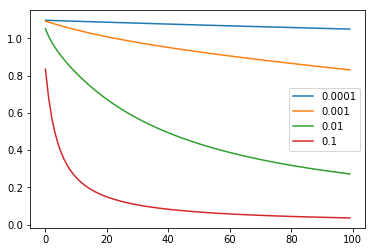

In [13]:
print(len(allCostHistory))
for ch in allCostHistory:
    plt.plot(allCostHistory[ch], label=ch)
plt.legend()
plt.show()

The plot also shows pretty clearly that with a learning rate of 0.1 the cost converges the fastest and 0.01 is also making good progress over 5000 iterations. 0.0001 is hardly converging and 0.0001 is still pretty slow.